In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


2024-10-14 09:22:16.765919: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-14 09:22:16.767410: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-14 09:22:16.774740: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-14 09:22:16.794485: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 09:22:16.826711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# Charger le jeu de données CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Afficher la forme des données
print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
# Normalisation des données
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


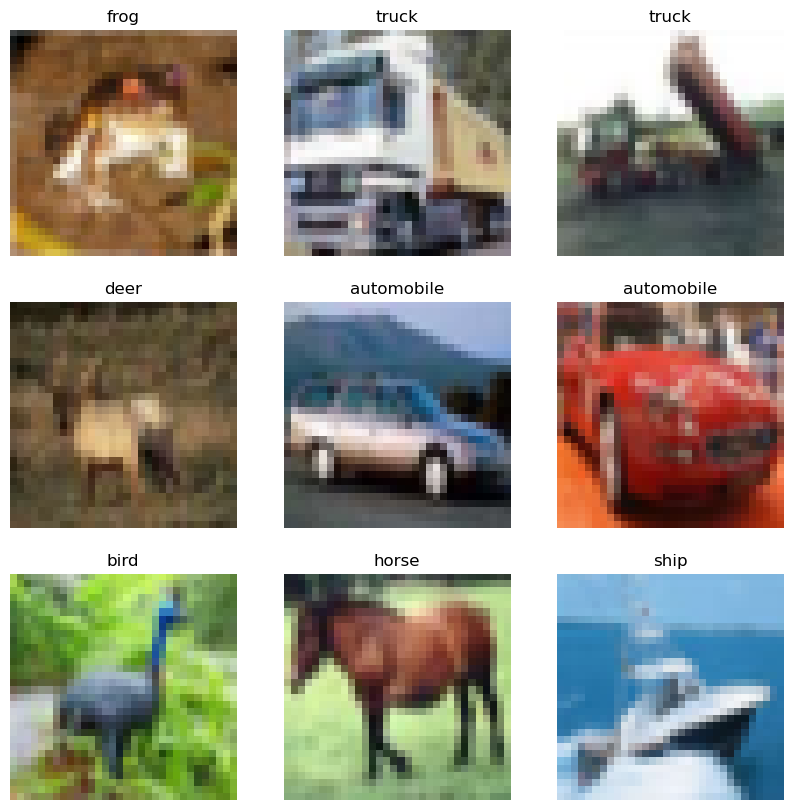

In [4]:
# Classes de CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Afficher quelques images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [5]:
# Construction du modèle avec l'utilisation de l'objet Input
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Définition explicite de l'entrée
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [6]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Entraînement du modèle
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.3416 - loss: 1.7657 - val_accuracy: 0.5458 - val_loss: 1.2598
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5720 - loss: 1.1952 - val_accuracy: 0.6229 - val_loss: 1.0881
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6355 - loss: 1.0386 - val_accuracy: 0.6502 - val_loss: 0.9889
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6786 - loss: 0.9219 - val_accuracy: 0.6682 - val_loss: 0.9528
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7079 - loss: 0.8325 - val_accuracy: 0.6932 - val_loss: 0.8833
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7323 - loss: 0.7636 - val_accuracy: 0.6992 - val_loss: 0.8780
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7519 - loss: 0.7109 - val_accuracy: 0.6866 - val_loss: 0.9160
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7687 -

In [8]:
# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


313/313 - 3s - 9ms/step - accuracy: 0.6930 - loss: 0.9311
Test accuracy: 0.6930


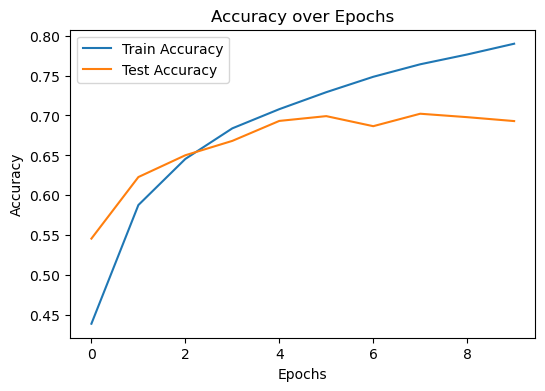

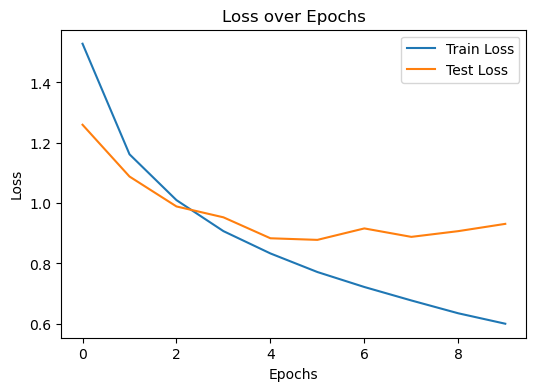

In [9]:
# Visualisation de la précision (accuracy)
plt.figure(figsize=(6, 4))  # Taille ajustée pour un graphique
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Sauvegarde du graphique de la précision
plt.savefig('precision_apprentissage.png', format='png')

plt.show()

# Visualisation de la perte (loss)
plt.figure(figsize=(6, 4))  # Taille ajustée pour un graphique
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Sauvegarde du graphique de la perte
plt.savefig('perte_apprentissage.png', format='png')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


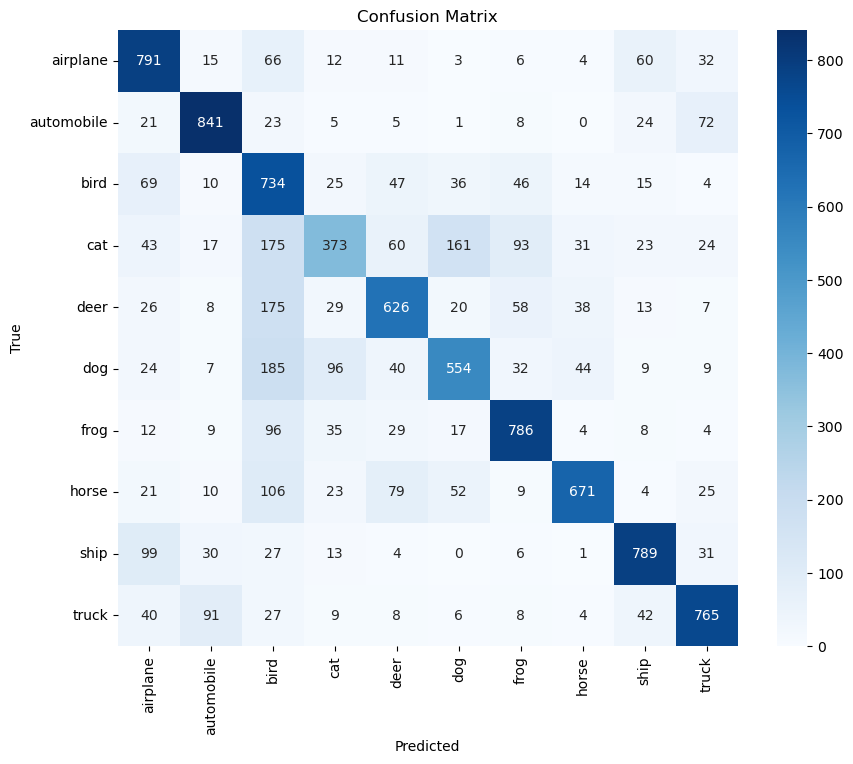

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# 1. Faire des prédictions sur les données de test
y_pred = model.predict(x_test)

# 2. Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Comme y_test est dans le format [[6], [1], [3], ...], on le convertit en un tableau plat
y_test_classes = y_test.flatten()

# 3. Générer la matrice de confusion
cm = confusion_matrix(y_test_classes, y_pred_classes)

# 4. Afficher la matrice de confusion avec Matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('matrice_de_confusion.png', format='png')

plt.show()


In [11]:
print(cm)

[[791  15  66  12  11   3   6   4  60  32]
 [ 21 841  23   5   5   1   8   0  24  72]
 [ 69  10 734  25  47  36  46  14  15   4]
 [ 43  17 175 373  60 161  93  31  23  24]
 [ 26   8 175  29 626  20  58  38  13   7]
 [ 24   7 185  96  40 554  32  44   9   9]
 [ 12   9  96  35  29  17 786   4   8   4]
 [ 21  10 106  23  79  52   9 671   4  25]
 [ 99  30  27  13   4   0   6   1 789  31]
 [ 40  91  27   9   8   6   8   4  42 765]]


In [12]:
from sklearn.metrics import classification_report

# 1. Faire des prédictions sur les données de test
y_pred = model.predict(x_test)

# 2. Convertir les prédictions en classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Comme y_test est dans le format [[6], [1], [3], ...], on le convertit en un tableau plat
y_test_classes = y_test.flatten()

# 3. Générer le rapport de classification
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)

# 4. Afficher le rapport de classification
print("Classification Report:\n")
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report:

              precision    recall  f1-score   support

    airplane       0.69      0.79      0.74      1000
  automobile       0.81      0.84      0.83      1000
        bird       0.45      0.73      0.56      1000
         cat       0.60      0.37      0.46      1000
        deer       0.69      0.63      0.66      1000
         dog       0.65      0.55      0.60      1000
        frog       0.75      0.79      0.77      1000
       horse       0.83      0.67      0.74      1000
        ship       0.80      0.79      0.79      1000
       truck       0.79      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



## optimisation du modele

In [12]:
# Exemple en ajoutant des Dropout
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout à 50%
    layers.Dense(10, activation='softmax')
])


In [13]:
from tensorflow.keras.applications import ResNet50

# Utilisation de ResNet50 pré-entraîné
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Ajouter des couches personnalisées pour CIFAR-10
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Geler les poids du modèle pré-entraîné
for layer in base_model.layers:
    layer.trainable = False

# Compiler et entraîner le modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 85ms/step - accuracy: 0.0990 - loss: 2.3462 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.1008 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 74ms/step - accuracy: 0.1002 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.1023 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1563/1

In [14]:
# Évaluation du modèle sur les données de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


313/313 - 20s - 65ms/step - accuracy: 0.1000 - loss: 2.3026
Test accuracy: 0.1000
Test loss: 2.3026


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step


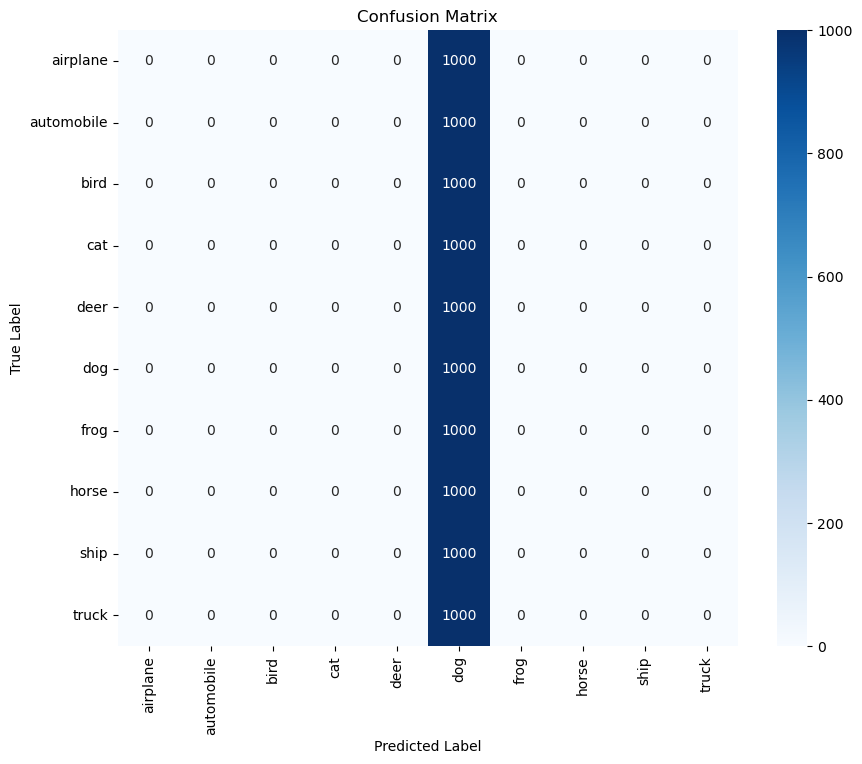

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions du modèle
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Conversion des probabilités en classes

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [16]:
from sklearn.metrics import classification_report

# Générer un rapport de classification
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)


              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1000
  automobile       0.00      0.00      0.00      1000
        bird       0.00      0.00      0.00      1000
         cat       0.00      0.00      0.00      1000
        deer       0.00      0.00      0.00      1000
         dog       0.10      1.00      0.18      1000
        frog       0.00      0.00      0.00      1000
       horse       0.00      0.00      0.00      1000
        ship       0.00      0.00      0.00      1000
       truck       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/home/hyont-nick/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hyont-nick/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hyont-nick/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt

# Visualisation des courbes d'apprentissage
plt.figure(figsize=(12, 4))

# Courbe de précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()
